In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# The following data describes the 911 call response times in the city of Seattle

## Attribute Information:

1. RMS CDW ID
2. General Offense Number
3. Offense Code
4. Offense Code Extension
5. Offense Type
6. Summary Offense Code
7. Summarized Offense Description
8. Date Reported
9. Occurred Date or Date Range Start
10. Occurred Date Range End
11. Hundred Block Location
12. District/Sector
13. Zone/Beat
14. Census Tract 2000
15. Longitude
16. Latitude
17. Location
18. Month
19. Year

In [4]:
spd_data = pd.read_csv("SPD_Incident_Report.csv",
                       names=['ID',
                              'OFFNUM',
                              'CODE',
                              'CODE_EXT',
                              'TYPE',
                              'SUMMARY_CODE',
                              'DESC',
                              'DATE_REPORTED',
                              'DATE_START',
                              'DATE_END',
                              'BLOCK',
                              'DISTRICT',
                              'ZONE',
                              'TRACT',
                              'LONG',
                              'LAT',
                              'LOCATION',
                              'MONTH',
                              'YEAR'],
                       sep=",",
                       low_memory=False,
)

## Which crimes occur most frequently?

In [5]:
spd_data["DESC"].value_counts()[:10]

BURGLARY           13330
CAR PROWL          12282
VEHICLE THEFT       8968
OTHER PROPERTY      7906
ASSAULT             6324
STOLEN PROPERTY     5359
PROPERTY DAMAGE     4569
SHOPLIFTING         3937
ROBBERY             3458
NARCOTICS           3278
Name: DESC, dtype: int64

## Which locations have the highest incidence of narcotics-related offenses?

In [6]:
narcotics = pd.DataFrame(spd_data[spd_data["DESC"] == "NARCOTICS"])

In [7]:
narcotics["DISTRICT"].value_counts()

M     817
K     524
E     414
N     250
D     197
O     158
R     138
F     137
G     111
U     104
S      76
J      74
B      69
W      66
Q      41
C      40
L      31
99     28
Name: DISTRICT, dtype: int64

## Are local murder rates increasing or decreasing over time?

In [8]:
homicide = pd.DataFrame(spd_data[spd_data["DESC"] == "HOMICIDE"])

In [9]:
homicides = pd.DataFrame(homicide["YEAR"].value_counts())

In [10]:
homicides.insert(0, "Year", [2016, 2014, 2017, 2015, 2013, 2011])

In [11]:
plt.bar(homicides.loc[:, "Year"], homicides.loc[:, "YEAR"])

<Container object of 6 artists>

In [12]:
plt.xlabel("Year")

In [13]:
plt.ylabel("Number of Homicides")

In [14]:
plt.title("Number of Homicides per Year")

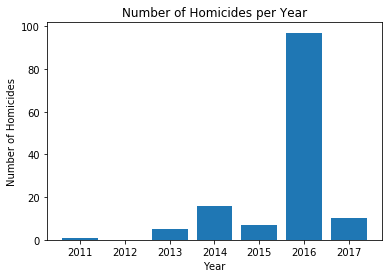

In [15]:
plt.show()

## Which months have the highest incidence of criminal activity?

In [16]:
offenses = pd.DataFrame(spd_data.loc[:, "MONTH"].value_counts()[:-1])

In [17]:
offenses.insert(0, "Month", [10, 11, 12, 9, 1, 8, 7, 6, 5, 4, 3, 2])

In [18]:
plt.bar(offenses.loc[:, "Month"], offenses.loc[:, "MONTH"])

<Container object of 12 artists>

In [19]:
plt.xlabel("Month")

In [20]:
plt.ylabel("Crimes")

In [21]:
plt.title("Criminal Activity by Month")

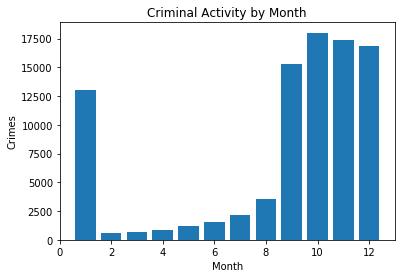

In [22]:
plt.show()

## What is the peak month for DUIs?

In [23]:
dui = pd.DataFrame(spd_data[spd_data["DESC"] == "DUI"])

In [24]:
by_month = pd.DataFrame(dui["MONTH"].value_counts())

In [25]:
by_month.insert(0, "Month", [1, 12, 11, 9, 10, 8, 7, 6])

In [26]:
plt.bar(by_month.loc[:,"Month"], by_month.loc[:,"MONTH"])

<Container object of 8 artists>

In [27]:
plt.xlabel("Month")

In [28]:
plt.ylabel("Number of DUIs")

In [29]:
plt.title("DUIs by Month")

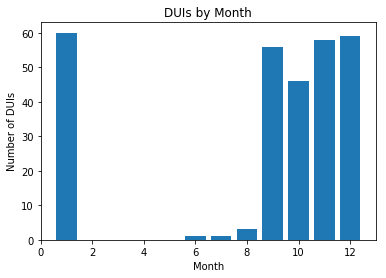

In [30]:
plt.show()